# **생능 출판사 "으뜸 데이터 분석과 머신러닝"(1판) 교재의 소스 코드**
## *9장 분류와 군집화*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 저자 : 박동규, 강영민
* 책의 소스코드 저장소 : https://github.com/dongupak/DataML
* 안내 : 이 노트북은 책의 코드를 담고 있습니다.
* 저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### 9.1 분류와 군집화

### 9.2 k-NN 알고리즘에 사용할 견종의 표본 집합 시각화

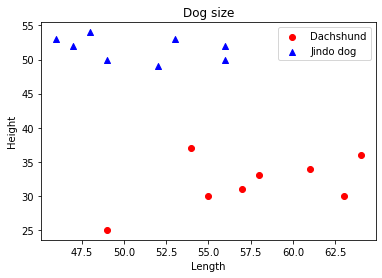

In [ ]:
import matplotlib.pyplot as plt

# 닥스훈트의 길이와 높이 데이터
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
# 진돗개의 길이와 높이 데이터
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

plt.scatter(dach_length, dach_height, c='r', label='Dachshund')
plt.scatter(jin_length, jin_height,c='b',marker='^', label='Jindo dog')

plt.xlabel('Length')             
plt.ylabel('Height')             
plt.title("Dog size")
plt.legend(loc='upper right')

### 9.3 k-NN 분류기를 실행하자 

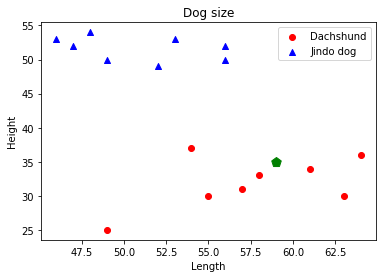

In [ ]:
import matplotlib.pyplot as plt

# 닥스훈트의 길이와 높이 데이터
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
# 진돗개의 길이와 높이 데이터
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

plt.scatter(dach_length, dach_height, c='r', label='Dachshund')
plt.scatter(jin_length, jin_height,c='b',marker='^', label='Jindo dog')

plt.xlabel('Length')             
plt.ylabel('Height')             
plt.title("Dog size")
plt.legend(loc='upper right')

newdata_length = [59]    # 새로운 데이터의 길이
newdata_height = [35]    # 새로운 데이터의 높이

# 새 데이터의 표식은 오각형(pentagon)으로 설정하고, 레이블은 new Data로
plt.scatter(newdata_length, newdata_height, s=100, marker='p',\
            c='g', label='new Data')

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 

# 닥스훈트의 길이와 높이 데이터
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
# 진돗개의 길이와 높이 데이터
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data))   # 닥스훈트는 0으로 레이블링
j_data = np.column_stack((jin_length, jin_height))
j_label = np.ones(len(j_data))   # 진돗개는 1로 레이블링

newdata = [[59, 35]]

dogs = np.concatenate((d_data, j_data))
labels = np.concatenate((d_label, j_label))

dog_classes = {0:'닥스훈트', 1:'진돗개'} 

k = 3     # k를 3으로 두고 kNN 분류기를 만들어 보자
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)
print('데이터', newdata, ', 판정 결과:', dog_classes[y_pred[0]])

데이터 [[59, 35]] , 판정 결과: 닥스훈트


#### 참고 코드 : kNN에서 이웃한 데이터를 얻는 코드

dist = [[2.23606798 2.23606798 4.47213595]] indexes = [[4 7 1]] dogs[indexes]= [[[58 33]
  [61 34]
  [57 31]]]
data = (16, 2)
index = (1, 3)
k = 3
데이터 [[59, 35]] , 판정 결과: 닥스훈트


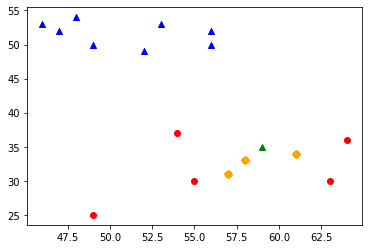

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 
import matplotlib.pyplot as plt

# 닥스훈트의 길이와 높이 데이터
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
# 진돗개의 길이와 높이 데이터
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data))   # 닥스훈트는 0으로 레이블링
j_data = np.column_stack((jin_length, jin_height))
j_label = np.ones(len(j_data))   # 진돗개는 1로 레이블링

newdata = [[59, 35]]

dogs = np.concatenate((d_data, j_data))
labels = np.concatenate((d_label, j_label))

dog_classes = {0:'닥스훈트', 1:'진돗개'} 

k = 3     # k를 3으로 두고 kNN 분류기를 만들어 보자
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)

distances, indexes = knn.kneighbors(newdata)
#plt.scatter(train_input[indexes], train_target[indexes], marker='D')
print('dist =', distances, 'indexes =', indexes, 'dogs[indexes]=', dogs[indexes])

def draw_neightbor(data, index, k):
    print('data =', data.shape)
    print('index =', index.shape)
    print('k =', k)
    for i in range(k):
        plt.scatter(data[index][0][i][0], dogs[index][0][i][1], marker='D', color='orange')

plt.scatter(59, 35, color = 'green', marker='^')
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(jin_length, jin_height,c='blue',marker='^', label='Jindo dog')

draw_neightbor(dogs, indexes, k)
print('데이터', newdata, ', 판정 결과:', dog_classes[y_pred[0]])

In [ ]:
distances.shape

(1, 3)

In [ ]:
indexes.shape

(1, 3)

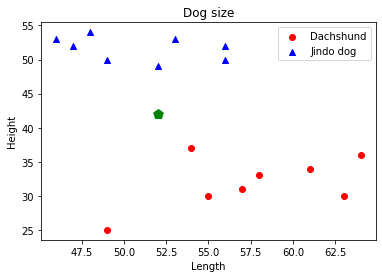

In [ ]:
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(jin_length, jin_height,c='blue',marker='^', label='Jindo dog')

plt.xlabel('Length')             
plt.ylabel('Height')             
plt.title("Dog size")
plt.legend(loc='upper right')

newdata_length = [52]    # 새로운 데이터의 길이
newdata_height = [42]    # 새로운 데이터의 높이

newdata = [[52, 42]]

# ...코드 생략
# 새 데이터의 표식은 오각형(pentagon)으로 설정하고, 레이블은 new Data로
plt.scatter(newdata_length, newdata_height, s=100, marker='p', c='green', label='new Data')

In [ ]:
newdata = [[52, 42]]

k = 1     # k를 1으로 두고 kNN 분류기를 만들어 보자
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)
print('데이터', newdata, ', 판정 결과:', dog_classes[y_pred[0]])

데이터 [[52, 42]] , 판정 결과: 닥스훈트


데이터 [[52, 42]] , 판정 결과: 진돗개
distances [[ 5.38516481  7.          8.54400375  8.94427191 10.77032961]] , indexes: [[ 6 14 12 10  8]]
data = (16, 2)
index = (1, 5)
k = 5


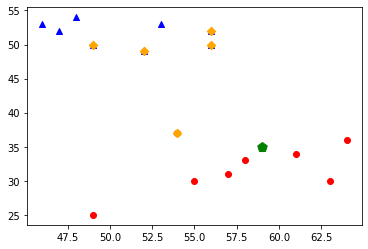

In [ ]:
newdata = [[52, 42]]

k = 5     # k를 5으로 두고 kNN 분류기를 만들어 보자
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)
print('데이터', newdata, ', 판정 결과:', dog_classes[y_pred[0]])

distances, indexes = knn.kneighbors(newdata)
print('distances', distances, ', indexes:', indexes)
plt.scatter(newdata_length, newdata_height, s=100, marker='p', c='green', label='new Data')
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(jin_length, jin_height,c='blue',marker='^', label='Jindo dog')
draw_neightbor(dogs, indexes, k)

In [ ]:
k = 9     # k를 3으로 두고 kNN 분류기를 만들어 보자
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)
print('데이터', newdata, ', 판정 결과:', dog_classes[y_pred[0]])

데이터 [[52, 42]] , 판정 결과: 진돗개


### 9.4 k-NN 활용 예제 - 붓꽃 데이터 준비하기

In [ ]:
from sklearn.datasets import load_iris 

iris = load_iris() 
iris.data[:3]     # 최초 3개 데이터의 값을 출력

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [ ]:
print('iris 데이터의 형태:', iris.data.shape)

iris 데이터의 형태: (150, 4)


In [ ]:
print('iris 데이터의 속성들:', iris.feature_names)

iris 데이터의 속성들: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print('iris 데이터의 레이블:', iris.target)

iris 데이터의 레이블: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = pd.Series(iris.target)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 9.5 k-NN 활용 예제 - 붓꽃 데이터로 학습하기

In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
iris_df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [ ]:
iris_df.values

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [ ]:
X = iris_df.iloc[:, :4]
y = iris_df.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 

def iris_knn(X, y, k):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)
    knn = KNeighborsClassifier(n_neighbors = k) 
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test) 
    return metrics.accuracy_score(y_test, y_pred) 

k = 3
scores = iris_knn(X, y, k)
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(k, scores))

n_neighbors가 3일때 정확도: 0.956


### 9.6 새로운 데이터에 대하여 모델을 적용하고 분류



In [ ]:
from sklearn.datasets import load_iris 
from sklearn.neighbors import KNeighborsClassifier 
 
k = 3
iris = load_iris() 
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(iris.data, iris.target) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
classes = {0:'setosa', 1:'versicolor', 2:'virginica'} 
 
# 새로운 데이터를 제시해 보자. 
X = [[4, 2, 1.3, 0.4], 
     [4, 3, 3.2, 2.2]] 
y = knn.predict(X) 
 
print('{} 특성을 가지는 품종: {}'.format(X[0], classes[y[0]])) 
print('{} 특성을 가지는 품종: {}'.format(X[1], classes[y[1]]))

[4, 2, 1.3, 0.4] 특성을 가지는 품종: setosa
[4, 3, 3.2, 2.2] 특성을 가지는 품종: versicolor


In [ ]:
y_pred_all = knn.predict(iris.data)
scores = metrics.accuracy_score(iris.target, y_pred_all)
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(k, scores))

n_neighbors가 3일때 정확도: 0.960


(array([[50.,  0.,  0.],
        [ 0., 47.,  3.],
        [ 0.,  3., 47.]]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <matplotlib.collections.QuadMesh at 0x7f1f16b39090>)

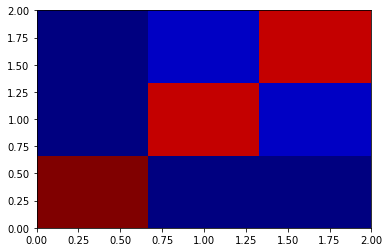

In [ ]:
import matplotlib.pyplot as plt
plt.hist2d(iris.target, y_pred_all, bins=(3,3), cmap=plt.cm.jet)

(array([[50.,  0.,  0.],
        [ 0., 47.,  3.],
        [ 0.,  3., 47.]]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <matplotlib.collections.QuadMesh at 0x7f1f16b2d810>)

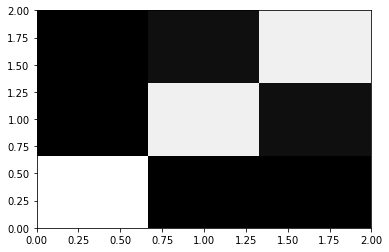

In [ ]:
import matplotlib.pyplot as plt
plt.hist2d(iris.target, y_pred_all, bins=(3,3), cmap=plt.cm.gray)

### 9.8 데이터 전처리의 필요성

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_loc = 'https://github.com/dongupak/DataML/raw/main/csv/'
game_usage = pd.read_csv(data_loc + 'game_usage.csv')
game_usage.head(3)

,time spent,game level
0,39,944
1,55,705
2,29,757


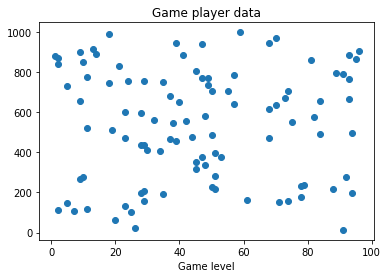

In [ ]:
X = game_usage['time spent']
Y = game_usage['game level']

# 으뜸 게임사의 게임 이용자 분석: 산포도 그래프
plt.title("Game player data")
plt.xlabel('Time spent')
plt.xlabel('Game level') 
plt.scatter(X, Y)

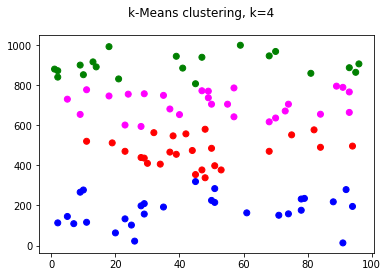

In [ ]:
from sklearn import cluster

def kmeans_predict_plot(data, k):
   model = cluster.KMeans(n_clusters=k)
   model.fit(data)
   labels = model.predict(data)
   colors = np.array(['red', 'green', 'blue', 'magenta'])
   plt.suptitle('k-Means clustering, k={}'.format(k))
   plt.scatter(data[:, 0], data[:, 1], color=colors[labels])

gamer_data = np.column_stack((X, Y))
kmeans_predict_plot(gamer_data, k = 4)

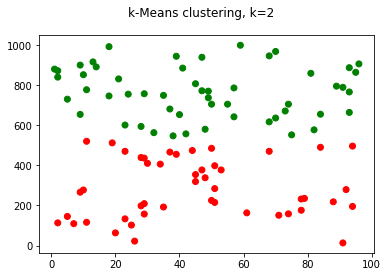

In [ ]:
# k = 2일때의 결과
from sklearn import cluster

gamer_data = np.column_stack((time_data, level_data))

def kmeans_predict_plot(X, k):
    model = cluster.KMeans(n_clusters=k)
    model.fit(X)
    labels = model.predict(X)
    colors = np.array(['red', 'green', 'blue', 'magenta']) 
    plt.suptitle('k-Means clustering, k={}'.format(k)) 
    plt.scatter(X[:, 0], X[:, 1], color=colors[labels])

kmeans_predict_plot(gamer_data, k = 2)

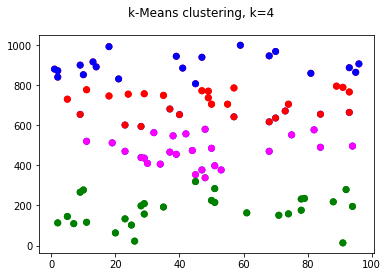

In [ ]:
 kmeans_predict_plot(gamer_data, k = 3) # 3개의 군집 생성 
 kmeans_predict_plot(gamer_data, k = 4) # 4개의 군집 생성

### 9.9 데이터 전처리의 필요성

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_loc = 'https://github.com/dongupak/DataML/raw/main/csv/'
game_usage = pd.read_csv(data_loc + 'game_usage.csv')
game_usage.head(3)

,time spent,game level
0,39,944
1,55,705
2,29,757


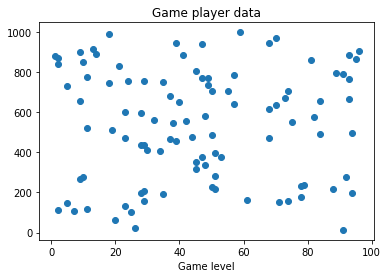

In [ ]:
X = game_usage['time spent']
Y = game_usage['game level']

# 으뜸 게임사의 게임 이용자 분석: 산포도 그래프
plt.title("Game player data")
plt.xlabel('Time spent')
plt.xlabel('Game level') 
plt.scatter(X, Y)

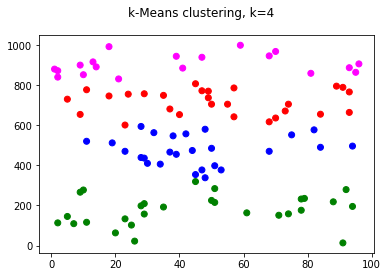

In [ ]:
from sklearn import cluster

def kmeans_predict_plot(data, k):
    model = cluster.KMeans(n_clusters=k)
    model.fit(data)
    labels = model.predict(data)
    colors = np.array(['red', 'green', 'blue', 'magenta']) 
    plt.suptitle('k-Means clustering, k={}'.format(k)) 
    plt.scatter(data[:, 0], data[:, 1], color=colors[labels])

gamer_data = np.column_stack((X, Y))
kmeans_predict_plot(gamer_data, k = 4)

(0.0, 1000.0)

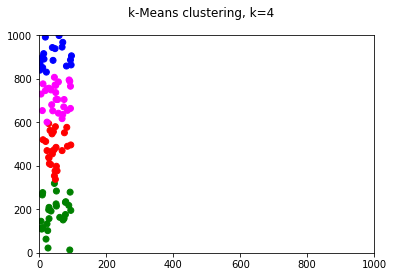

In [ ]:
kmeans_predict_plot(gamer_data, k = 4)
plt.xlim(0, 1000); plt.ylim(0, 1000)

### 9.6 데이터 정규화 방법을 이용하자

In [ ]:
# 최대, 최소값 스케일러
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(gamer_data)
n_data = scaler.transform(gamer_data)
n_data[:, 0].mean(), n_data[:, 1].mean()

(0.4731578947368421, 0.5324949290060852)

In [ ]:
n_data[:, 0].min(), n_data[:, 0].max()

(0.0, 1.0)

In [ ]:
n_data[:, 1].min(), n_data[:, 1].max()

(0.0, 1.0)

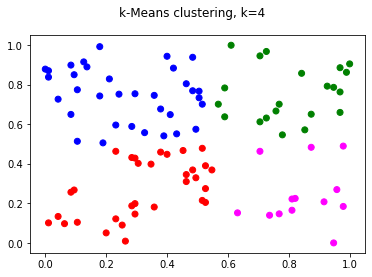

In [ ]:
kmeans_predict_plot(n_data, k = 4) # 4개의 군집 생성

### 9.9 다양한 스케일러 살펴보기

In [ ]:
import numpy as np

a = np.array([10, 8, 10, 8, 8, 4])
print('합계 :', a.sum())
print('평균 :', a.mean())
print('분산 :', a.var())
print('표준편차 :', a.std())

합계 : 48
평균 : 8.0
분산 : 4.0
표준편차 : 2.0


In [ ]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(gamer_data)
gamer_data_scaled = standardScaler.transform(gamer_data)

gamer_data_scaled[:, 0].std(), gamer_data_scaled[:, 1].std()

(1.0000000000000002, 1.0)

In [ ]:
gamer_data_scaled[:, 0].mean(), gamer_data_scaled[:, 1].mean()

(-1.1435297153639113e-16, 1.1546319456101628e-16)

## 감사합니다